In [7]:
import pandas as pd
import re
import numpy as np


In [8]:
#df2.to_csv("댓글100.csv", index=False)
#df1.to_csv("해시태그100.csv", index=False)
#df.to_csv("본문100.csv", index=False)

In [125]:
df=pd.read_csv("../data/본문.csv")
df1=pd.read_csv("../data/해시태그.csv")
df2=pd.read_csv("../data/댓글.csv")


In [10]:
print(len(df))
print(len(df1))
print(len(df2))

99
99
284


In [126]:
df3

,본문,시간,년,월,일,시,d
0,20190520,2019-05-20T10:28:53.000Z,2019,5,20,10,0
1,NaN,2019-05-05T12:21:44.000Z,2019,5,5,12,0
2,NaN,2019-01-25T07:05:15.000Z,2019,1,25,7,0
3,점심먹고 저녁에 올리기,2019-01-25T10:01:03.000Z,2019,1,25,10,0
4,NaN,2019-05-27T05:44:16.000Z,2019,5,27,5,0
5,@__j.y___ 잘먹었습니다 꺼억❤실습끝났다!!!!!! 드디어!!!!!!! 2주간...,2019-04-05T06:15:40.000Z,2019,4,5,6,0
6,NaN,2019-01-22T14:35:09.000Z,2019,1,22,14,0
7,⠀⠀⠀⠀⠀⠀삼양 튀김쫄면.⠀⠀⠀쫄면 하나로는 채울 수 없는 MSG의 보충을 위해 치...,2019-06-08T00:25:01.000Z,2019,6,8,0,1
8,오늘도 그냥 오지 못하고 새로운 사진의 비비고김이랑 비비고칩 사가지고 집으로~~이제...,2019-05-01T07:58:35.000Z,2019,5,1,7,0
9,NaN,2019-03-09T05:41:56.000Z,2019,3,9,5,0


In [11]:
s1=[]
s2=[]
s3=[]
h1=[]
for i in range(0,len(df2)):
    s=re.split('[:]+', df2["시간"][i])[0]
    s1.append(s)
    s=re.split("T", s1[i])[1]
    s2.append(s)
    k=re.split("T", s1[i])[0]
    s3.append(k)
    h=re.split("-", s3[i])
    h1.append(h)
hh= pd.DataFrame(h1)
hh.columns = ['년', '월','일']
df2_2=pd.concat([df2, hh], axis=1)
df2_2["시"]=s2

In [12]:
len(s2)

284

In [13]:
s1=[]
s2=[]
s3=[]
h1=[]
for i in range(0,len(df1)):
    s=re.split('[:]+', df1["시간"][i])[0]
    s1.append(s)
    s=re.split("T", s1[i])[1]
    s2.append(s)
    k=re.split("T", s1[i])[0]
    s3.append(k)
    h=re.split("-", s3[i])
    h1.append(h)
hh= pd.DataFrame(h1)
hh.columns = ['년', '월','일']
df1_2=pd.concat([df1, hh], axis=1)
df1_2["시"]=s2
df_2=pd.concat([df, hh], axis=1)
df_2["시"]=s2

In [14]:
df1_2

,해시태그,시간,년,월,일,시
0,"['컵불닭볶음면 ', '비비고만두 ', '레쓰비연유커피 누님 잘 모셔주는 착한 동...",2019-04-25T05:20:51.000Z,2019,04,25,05
1,"['부부일상', '신혼일기', '신혼', '신혼스타그램', '분식', '비비고', ...",2018-12-06T14:03:41.000Z,2018,12,06,14
2,"['부부의날', '작약', '행복', '꿍스떡볶이', '비비고만두', '아사히맥주'...",2019-05-24T00:31:30.000Z,2019,05,24,00
3,"['깜짝선물 받은 ', '폴란드그릇 ', '밀라포터리 ', '폴란드도자기', '항아...",2019-06-11T10:50:43.000Z,2019,06,11,10
4,"['비비고왕교자', '비비고만두', '만두는비비고가진리', '초등간식', '흡입 '...",2019-03-14T10:39:59.000Z,2019,03,14,10
5,"['양주 ', '내장탕 ', '물회 ', '광어회🐟 ', '고추만두 ', '비비고만...",2019-05-15T04:02:31.000Z,2019,05,15,04
6,"['mlk ', 'holiday soooo ', 'freezing ', 'lunch...",2019-01-21T19:26:51.000Z,2019,01,21,19
7,"['떡볶이', '달콤모임x범벅떡볶이', '분식최고', '비비고만두']",2019-04-09T13:06:50.000Z,2019,04,09,13
8,"['떡국 ', '떡만두국 ', '홈메이드 ', '민짱표 ', '한살 ', '더먹기 ...",2019-02-05T12:09:43.000Z,2019,02,05,12
9,"['오늘 ', '저녁 은 ', '찐만두', '비비고만두 맛있쪙!', '맛있다 ', ...",2019-06-05T12:03:02.000Z,2019,06,05,12


In [15]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [16]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [17]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [13]:
df1_2[df1_2["시"]=="20"]["해시태그"]

#df[df['E'].isin(['two', 'four'])]

Series([], Name: 해시태그, dtype: object)

In [56]:
hash00_02=df1_2[df1_2["시"].isin(["00","01","02"])]["해시태그"]
hash03_05=df1_2[df1_2["시"].isin(["03","04","05"])]["해시태그"]
hash06_08=df1_2[df1_2["시"].isin(["06","07","08"])]["해시태그"]
hash09_11=df1_2[df1_2["시"].isin(["09","10","11"])]["해시태그"]
hash12_14=df1_2[df1_2["시"].isin(["12","13","14"])]["해시태그"]
hash15_17=df1_2[df1_2["시"].isin(["15","16","17"])]["해시태그"]
hash18_20=df1_2[df1_2["시"].isin(["18","19","20"])]["해시태그"]
hash21_23=df1_2[df1_2["시"].isin(["21","22","23"])]["해시태그"]
hashday=df1_2[df1_2["시"].isin(["00","01","02","03","04","05","06","07","08","09","10","11"])]["해시태그"]
hashnight=df1_2[df1_2["시"].isin(["12","13","14","15","16","17","18","19","20","21","22","23"])]["해시태그"]

In [57]:
main00_02=df_2[df_2["시"].isin(["00","01","02"])]["본문"]
main03_05=df_2[df_2["시"].isin(["03","04","05"])]["본문"]
main06_08=df_2[df_2["시"].isin(["06","07","08"])]["본문"]
main09_11=df_2[df_2["시"].isin(["09","10","11"])]["본문"]
main12_14=df_2[df_2["시"].isin(["12","13","14"])]["본문"]
main15_17=df_2[df_2["시"].isin(["15","16","17"])]["본문"]
main18_20=df_2[df_2["시"].isin(["18","19","20"])]["본문"]
main21_23=df_2[df_2["시"].isin(["21","22","23"])]["본문"]
mainday=df_2[df_2["시"].isin(["00","01","02","03","04","05","06","07","08","09","10","11"])]["본문"]
mainnight=df_2[df_2["시"].isin(["12","13","14","15","16","17","18","19","20","21","22","23"])]["본문"]

In [58]:
chat00_02=df2_2[df2_2["시"].isin(["00","01","02"])]["댓글"]
chat03_05=df2_2[df2_2["시"].isin(["03","04","05"])]["댓글"]
chat06_08=df2_2[df2_2["시"].isin(["06","07","08"])]["댓글"]
chat09_11=df2_2[df2_2["시"].isin(["09","10","11"])]["댓글"]
chat12_14=df2_2[df2_2["시"].isin(["12","13","14"])]["댓글"]
chat15_17=df2_2[df2_2["시"].isin(["15","16","17"])]["댓글"]
chat18_20=df2_2[df2_2["시"].isin(["18","19","20"])]["댓글"]
chat21_23=df2_2[df2_2["시"].isin(["21","22","23"])]["댓글"]
chatday=df2_2[df2_2["시"].isin(["00","01","02","03","04","05","06","07","08","09","10","11"])]["댓글"]
chatnight=df2_2[df2_2["시"].isin(["12","13","14","15","16","17","18","19","20","21","22","23"])]["댓글"]

In [23]:
#hannanum.nouns(str(hash00_02))

In [24]:
#Komoran.nouns(str(hash00_02))

#komoran.nouns("\n".join([s for s in str(hash00_02).split("\n") if s]))

In [22]:
from konlpy.tag import Twitter
from collections import Counter


In [23]:
def strip_e(st):
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return RE_EMOJI.sub(r'', st)

def get_tags(text, ntags=50):
    spliter = okt
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list

In [127]:
a1=get_tags(strip_e(str(hash00_02)))
#a1=pd.DataFrame(a1)


In [129]:
dict(a1)

{'tag': 'count'}

In [29]:
a2=get_tags(strip_e(str(hash03_05)))
a2=pd.DataFrame(a2)


In [30]:
a3=get_tags(strip_e(str(hash06_08)))
a3=pd.DataFrame(a3)


In [31]:
a4=get_tags(strip_e(str(hash09_11)))
a4=pd.DataFrame(a4)


In [32]:
a5=get_tags(strip_e(str(hash12_14)))
a5=pd.DataFrame(a5)


In [33]:
a6=get_tags(strip_e(str(hash15_17)))
a6=pd.DataFrame(a6)


In [34]:
a7=get_tags(strip_e(str(hash18_20)))
a7=pd.DataFrame(a7)


In [35]:
a8=get_tags(strip_e(str(hash21_23)))
a8=pd.DataFrame(a8)


In [36]:
b1=get_tags(strip_e(str(main00_02)))
b1=pd.DataFrame(b1)

In [37]:
b2=get_tags(strip_e(str(main03_05)))
b2=pd.DataFrame(b2)

In [38]:
b3=get_tags(strip_e(str(main06_08)))
b3=pd.DataFrame(b3)

In [39]:
b4=get_tags(strip_e(str(main09_11)))
b4=pd.DataFrame(b4)

In [40]:
b5=get_tags(strip_e(str(main12_14)))
b5=pd.DataFrame(b5)

In [41]:
b6=get_tags(strip_e(str(main15_17)))
b6=pd.DataFrame(b6)

In [42]:
b7=get_tags(strip_e(str(main18_20)))
b7=pd.DataFrame(b7)

In [43]:
b8=get_tags(strip_e(str(main21_23)))
b8=pd.DataFrame(b8)

In [44]:
c1=get_tags(strip_e(str(chat00_02)))
c1=pd.DataFrame(c1)

In [45]:
c2=get_tags(strip_e(str(chat03_05)))
c2=pd.DataFrame(c2)

In [46]:
c3=get_tags(strip_e(str(chat06_08)))
c3=pd.DataFrame(c3)

In [47]:
c4=get_tags(strip_e(str(chat09_11)))
c4=pd.DataFrame(c4)

In [48]:
c5=get_tags(strip_e(str(chat12_14)))
c5=pd.DataFrame(c5)

In [49]:
c6=get_tags(strip_e(str(chat15_17)))
c6=pd.DataFrame(c6)

In [50]:
c7=get_tags(strip_e(str(chat18_20)))
c7=pd.DataFrame(c7)

In [51]:
c8=get_tags(strip_e(str(chat21_23)))
c8=pd.DataFrame(c8)

In [63]:
b4

,count,tag
0,3,오늘
1,2,만두
2,2,저녁
3,1,러버
4,1,최애
5,1,안주
6,1,나이
7,1,국
8,1,살
9,1,떡


In [59]:
aday=get_tags(strip_e(str(hashday)))
aday=pd.DataFrame(aday)
anight=get_tags(strip_e(str(hashnight)))
anight=pd.DataFrame(anight)

In [60]:
bday=get_tags(strip_e(str(mainday)))
bday=pd.DataFrame(bday)
bnight=get_tags(strip_e(str(mainnight)))
bnight=pd.DataFrame(bnight)

In [61]:
cday=get_tags(strip_e(str(chatday)))
#cday=pd.DataFrame(cday)
cnight=get_tags(strip_e(str(chatnight)))
#cnight=pd.DataFrame(cnight)

In [62]:
cday

[{'count': 7, 'tag': '비비고'},
 {'count': 6, 'tag': '만두'},
 {'count': 4, 'tag': '소통'},
 {'count': 4, 'tag': '저'},
 {'count': 4, 'tag': '선물'},
 {'count': 3, 'tag': '애'},
 {'count': 3, 'tag': '선팔'},
 {'count': 3, 'tag': '살'},
 {'count': 3, 'tag': '구경'},
 {'count': 3, 'tag': '가요'},
 {'count': 3, 'tag': '최고'},
 {'count': 2, 'tag': '게이트'},
 {'count': 2, 'tag': '사진'},
 {'count': 2, 'tag': '한번'},
 {'count': 2, 'tag': '피드'},
 {'count': 2, 'tag': '방문'},
 {'count': 2, 'tag': '교자'},
 {'count': 2, 'tag': '한섬'},
 {'count': 2, 'tag': '부자'},
 {'count': 2, 'tag': '진짜'},
 {'count': 2, 'tag': '스타'},
 {'count': 2, 'tag': '그램'},
 {'count': 2, 'tag': '요리'},
 {'count': 2, 'tag': '복'},
 {'count': 2, 'tag': '정보'},
 {'count': 2, 'tag': '집밥'},
 {'count': 2, 'tag': '사서'},
 {'count': 2, 'tag': '걸'},
 {'count': 2, 'tag': '주말'},
 {'count': 2, 'tag': '포장'},
 {'count': 2, 'tag': '고급'},
 {'count': 1, 'tag': '맥주'},
 {'count': 1, 'tag': '니'},
 {'count': 1, 'tag': '신랑'},
 {'count': 1, 'tag': '낭만'},
 {'count': 1, 'tag': '다야

In [63]:
cnight

[{'count': 9, 'tag': '소통'},
 {'count': 7, 'tag': '만두'},
 {'count': 5, 'tag': '맛'},
 {'count': 5, 'tag': '선팔'},
 {'count': 5, 'tag': '비빔면'},
 {'count': 4, 'tag': '사랑'},
 {'count': 4, 'tag': '보고'},
 {'count': 4, 'tag': '용'},
 {'count': 4, 'tag': '맞팔'},
 {'count': 3, 'tag': '우리'},
 {'count': 3, 'tag': '사진'},
 {'count': 3, 'tag': '나'},
 {'count': 3, 'tag': '오늘'},
 {'count': 3, 'tag': '닭발'},
 {'count': 3, 'tag': '이'},
 {'count': 3, 'tag': '구경'},
 {'count': 3, 'tag': '피드'},
 {'count': 2, 'tag': '인'},
 {'count': 2, 'tag': '요'},
 {'count': 2, 'tag': '수산물'},
 {'count': 2, 'tag': '떡볶이'},
 {'count': 2, 'tag': '비'},
 {'count': 2, 'tag': '저'},
 {'count': 2, 'tag': '걸'},
 {'count': 2, 'tag': '한섬'},
 {'count': 2, 'tag': '징'},
 {'count': 2, 'tag': '진짜'},
 {'count': 2, 'tag': '비비고'},
 {'count': 2, 'tag': '저녁'},
 {'count': 2, 'tag': '우왕'},
 {'count': 2, 'tag': '고고'},
 {'count': 1, 'tag': '피드보'},
 {'count': 1, 'tag': '맘'},
 {'count': 1, 'tag': '온라인'},
 {'count': 1, 'tag': '쇼핑몰'},
 {'count': 1, 'tag': '바다

In [64]:
#워드 클라우드
#from wordcloud import WordCloud
#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
#wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
#plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
#plt.axis("off")
#plt.show()

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import pytagcloud

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [40]:
from collections import Counter
from konlpy.tag import Twitter
import pytagcloud
 

nlp = Twitter()
nouns = nlp.nouns(strip_e(str(hashday)))
 
count = Counter(nouns)
tags2 = count.most_common(40)
taglist = pytagcloud.make_tags(tags2, maxsize=80)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='korean', rectangular=False)
 


C:\Users\OliviaKim\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [41]:
tags2

[('비비고', 36),
 ('만두', 35),
 ('그램', 9),
 ('저녁', 7),
 ('집밥', 7),
 ('요리', 6),
 ('왕교', 5),
 ('스타', 5),
 ('군', 5),
 ('떡볶이', 4),
 ('오늘', 4),
 ('파채', 4),
 ('떡', 4),
 ('메뉴', 4),
 ('간식', 3),
 ('나이', 3),
 ('계란', 3),
 ('끼', 3),
 ('비', 3),
 ('자취', 3),
 ('짜장', 3),
 ('점심', 3),
 ('우리', 3),
 ('박서준', 3),
 ('준비', 3),
 ('시간', 3),
 ('신혼', 3),
 ('폴란드', 2),
 ('좀', 2),
 ('어제', 2),
 ('비빔면', 2),
 ('떡국', 2),
 ('새해', 2),
 ('야채', 2),
 ('볶음밥', 2),
 ('거', 2),
 ('뭐', 2),
 ('혼밥', 2),
 ('만두국', 2),
 ('생', 2)]

In [42]:
taglist

[{'color': (180, 74, 161), 'size': 83, 'tag': '비비고'},
 {'color': (132, 16, 188), 'size': 81, 'tag': '만두'},
 {'color': (22, 208, 138), 'size': 29, 'tag': '그램'},
 {'color': (215, 183, 220), 'size': 24, 'tag': '집밥'},
 {'color': (197, 16, 150), 'size': 24, 'tag': '저녁'},
 {'color': (134, 206, 165), 'size': 22, 'tag': '요리'},
 {'color': (45, 31, 211), 'size': 19, 'tag': '스타'},
 {'color': (148, 216, 67), 'size': 19, 'tag': '왕교'},
 {'color': (180, 171, 166), 'size': 19, 'tag': '군'},
 {'color': (106, 175, 171), 'size': 16, 'tag': '떡볶이'},
 {'color': (13, 64, 116), 'size': 16, 'tag': '메뉴'},
 {'color': (176, 203, 27), 'size': 16, 'tag': '파채'},
 {'color': (151, 50, 50), 'size': 16, 'tag': '오늘'},
 {'color': (95, 96, 175), 'size': 16, 'tag': '떡'},
 {'color': (155, 82, 134), 'size': 14, 'tag': '박서준'},
 {'color': (105, 165, 214), 'size': 14, 'tag': '신혼'},
 {'color': (50, 126, 205), 'size': 14, 'tag': '시간'},
 {'color': (198, 164, 23), 'size': 14, 'tag': '준비'},
 {'color': (136, 62, 192), 'size': 14, 'tag'

In [45]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='korean', rectangular=False)

In [46]:
from PIL import Image
import numpy as np


In [48]:
alice_mask = np.array(Image.open("../data/alice.png"))

In [114]:
dump1=np.array(Image.open("../data/dump.jpg"))

In [53]:
wordcloud = WordCloud.generate_from_frequencies(cday)

TypeError: generate_from_frequencies() missing 1 required positional argument: 'frequencies'

In [112]:

strip_e(str(chatday))

'3         이상하게 애낳고 맥주가 미친듯이 좋아;;;니 신랑 넘 낭만적이다야 다 챙기네~^^^\n4                                                \n5                                             소통해요:)ㅎㅎㅎㅎ\n6                          간장은 어딨나요.?선팔하고 갑니다~ 소통하며 지내요~\n7                                           게이트 ㅋㅋㅋㅋㅋㅋ\n8                            오~ 사진이 느낌있어요!! 저희도 한번 놀러오세요\n9                                              튀김 너무 탔다☺\n10                                   제 피드도 한번 방문부탁드릴게요!!\n11                               게이트 ㅋㅋㅋㅋ 저 어제 화 안났는데요?\n12                                                     \n29       #비비고#비비고만두#왕교자#김치교자#매운교자#한섬만두#소고기한섬만두#만두#만두부자#\n30                          야.. 애키워오지마래이.. 크면 낳을때 힘들데이..\n33                                      비비고 진짜 맛있어요\n34                              비비고 지금 살까말까 겁나 고민중인데,,,,\n35     #먹스타그램#술안주#안주추천#화요일#일상스타그램#직장인#취미생활#요리스타그램#푸드스...\n36                                                     .\n37                                   인스타 구경 잘하고 갑니다!!! \n38                             

In [131]:
wc=WordCloud(background_color="white",font_path=fontpath, max_words=2000, mask=dump1)
wc=wc.generate(strip_e(str(chatday)))


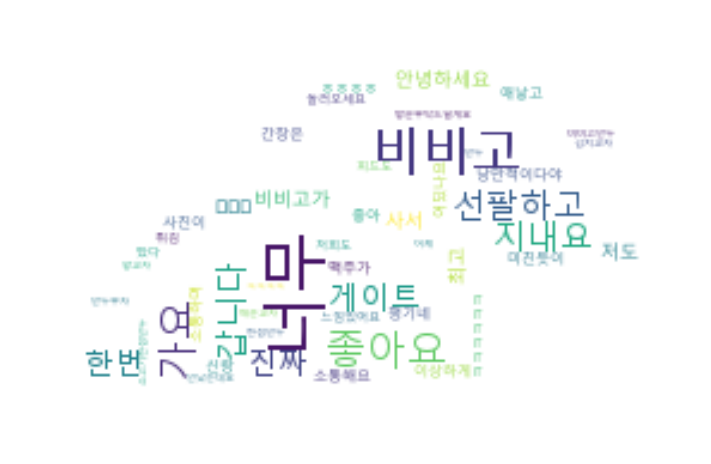

In [111]:
import matplotlib.pyplot as plt
import platform
from urllib.request import urlopen
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
   rc('font', family='AppleGothic')
elif platform.system() == 'Windows'    :
   path = "c:/Windows/Fonts/malgun.ttf"
   font_name = font_manager.FontProperties(fname=path).get_name()
   rc('font', family=font_name)
else:
   print('Unknown system')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
#alice_coloring=np.array(Image.open("../data/alice2.png"))
alice_coloring = np.array(Image.open("../data/alice2.png"))
dumpling=np.array(Image.open("../data/dumpling.jpeg"))
dump1=np.array(Image.open("../data/dump.jpg"))

In [116]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(alice_coloring)
image_colors1=ImageColorGenerator(dump1)
fontpath = 'C:/Windows/Fonts/malgun.ttf'
wc=WordCloud(background_color="white", max_words=2000,font_path=fontpath, mask=alice_coloring)
wc=wc.generate(strip_e(str(chatday)))

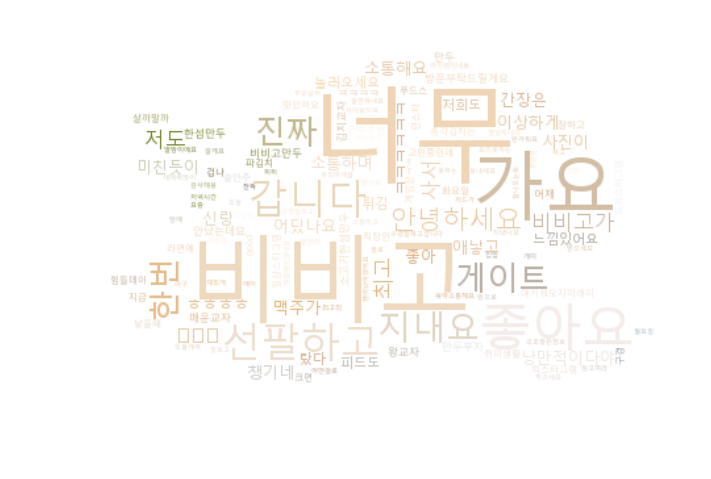

In [119]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors1), interpolation="bilinear")
plt.axis("off")
plt.show()

In [120]:
wc=wc.generate(strip_e(str(chatday)))

In [132]:
%matplotlib inline
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:

# konlpy, Mecab: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
nouns = okt.nouns(str(hashday))
nouns = [n for n in nouns if len(n) > 1]

# Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
count = Counter(nouns)
tags = count.most_common(40)

# WordCloud, matplotlib: 단어 구름 그리기
font_path = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
